# Deep Learning: Towards Deeper Understanding 

## [Reproducible Training and Image Captioning]

## Team Members
- Chien-Sheng WU  
    - Overfitting, Analysis, Report
- Peng XU 
    - Zero training-loss, Analysis, Report
- Nayeon LEE 
    - Image caption, Analysis, Report


## Prob1: Great Challenges of Reproducible Training of CNNs

### Code

* main.ipynb
* main_overfit_cnn.ipynb
* main_overfit_resnet.ipynb

### Dataset: Cifar-10

The Cifar10 dataset consists of 60,000 color images of size 32x32x3 in 10 classes, with 6000 images per class. It can be found at
   https://www.cs.toronto.edu/~kriz/cifar.html
   
##### Preprocessing:
We follow the preprocessing in the paper: Chiyuan Zhang, Samy Bengio, Moritz Hardt, Benjamin Recht, and Oriol Vinyals, Understand- ing deep learning requires rethinking generalization. https://arxiv.org/abs/1611.03530. 

We center-cropped our image into 28*28 dimensions. We standardize our image by removing the mean and then dividing the standard deviation for each image independantly. For random pixel, shuffle pixel, random pixel, random label, we created a dataset object to implement all these operations.

### Achieve ZERO training error in standard and randomized experiments

Chiyuan Zhang, Samy Bengio, Moritz Hardt, Benjamin Recht, and Oriol Vinyals, Understand- ing deep learning requires rethinking generalization. https://arxiv.org/abs/1611.03530


We trained the resnet18 model using stochastic gradient descent(SGD) with learning rate of 0.001 and momentum of 0.9. We also tried Adam optimizer. Surprisingly, SGD is much more efficient and the training loss doesn't decrease in some cases, for example, gaussian pixel,  if we use Adam optimizer but SGD can do it well.

We set the batch size of 40 and trained it for 25 epochs. We evaluated the training loss by going through the whole dataset every one thousand steps. We show the learning curves of these settings below. 

Model: We use resent18 as our model in this experiment.

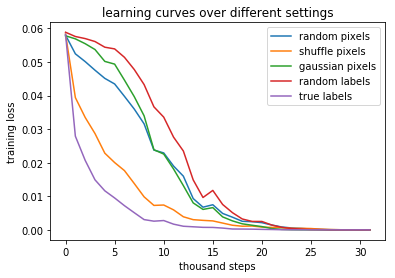

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.arange(32)
for i in range(5):
    plt.plot(x, losses[i])
plt.legend([ "random pixels", "shuffle pixels", "gaussian pixels", "random labels", "true labels" ], loc='upper right')
plt.xlabel(r"thousand steps")
plt.ylabel(r"training loss")

plt.title('learning curves over different settings')
plt.show()

##### discussion:
From those four curves, we can find that the loss for true labels decreases very fast, while random labels decreases most slowly, which reflects how much difficulty is the task. However, all the models can achieves zero training loss, which shows that deep learning models have strong modeling capability. Also, accuracy of labels tend to be more important than pixels.

We also evaluated the test set performance of the trained model. We found that random label got the worst accuracy (0.0950) on test datset compared to other noisy setting. It is even a bit worse than random guess, which is 0.1 of accuracy. Probably because that the corresponding mapping from image to label is lost and it overfits and learns nothing from the training data, thus cannot generalize. Shuffle pixel and random pixel get slightly better results than random guess.

| random pixel  | shuffle pixel  | gaussian pixel  | true label  | true label |
|---|---|---|---|---|
| 0.1980  | 0.1518  |  0.1021 | 0.0950  | 0.8040  |

### Non-overfitting of test error and overfitting of test loss when model complexity grows

Tomaso Poggio, K. Kawaguchi, Q. Liao, B. Miranda, L. Rosasco, X. Biox, J. Hidary, and H. Mhaskar. Theory of Deep Learning III: the non-overfitting puzzle. Jan 30, 2018. http://cbmm.mit.edu/publications/theory-deep-learning-iii-explaining-non-overfitting-puzzle

#### model1: 5-layer CNN without pooling
Same as the original paper, our model1 is a 5-layer all convolutional network (i.e., no pooling) with ReLUs. All hidden layers have the same number of channels. Neither data augmentation nor regularization is performed. SGD was used with batch size = 100 for 70 epochs for each point. There is clear overfitting in the expected risk.

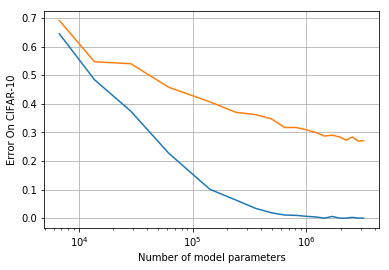

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.semilogx(x_value, y_value_train_error)
plt.semilogx(x_value, y_value_test_error)

plt.xlabel('Number of model parameters')
plt.ylabel('Error On CIFAR-10')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

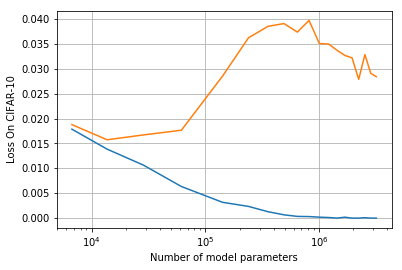

In [13]:
plt.semilogx(x_value, y_value_train_loss)
plt.semilogx(x_value, y_value_test_loss)

plt.xlabel('Number of model parameters')
plt.ylabel('Loss On CIFAR-10')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

#### model2: ResNet18
We use 18 layers Residual Network with PyTorch. Residual Networks (ResNet) is  a residual learning framework to ease the training of networks that are substantially deeper than those used previously. 

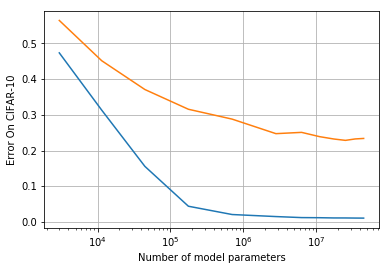

In [23]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.semilogx(x_value, y_value_train_error)
plt.semilogx(x_value, y_value_test_error)

plt.xlabel('Number of model parameters')
plt.ylabel('Error On CIFAR-10')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

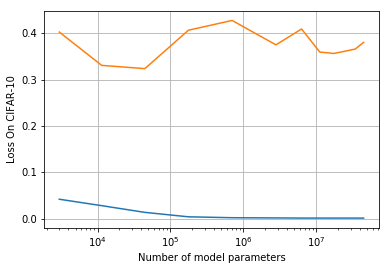

In [24]:
plt.semilogx(x_value, y_value_train_loss)
plt.semilogx(x_value, y_value_test_loss)

plt.xlabel('Number of model parameters')
plt.ylabel('Loss On CIFAR-10')
plt.grid(True)
#plt.savefig("test.png")
plt.show()

##### Discussion

* As you can see in the first CNN model, we successfully replicate the results from the original paper. The test accuracy does not change dramatically while we increase the parameters, that is, overfitting happens. However, the test loss start to increase a lot compared to the train loss.

* Why we may face the effect?
    * When the model capacity increases (parameter increase), the overfitting problem becomes more obvious.
    * However, if the model still can predict the true labels as the maximal logits, the test accuracy will not change that dramatically.
    * On the other hand, the test loss start to increase because the maximal logits decrease the value (even if they are still the dominent ones). 
    * Ex: 
        * the gold label is [0,0,1,0,0]
        * small model may predict [0.01, 0.02, 0.95, 0.01, 0.0]
        * big model may predict [0.05, 0.04, 0.74, 0.06, 0.11]
        * in this case, the true label still can correctly predict but the loss will increase

* In ResNet, differently, we cannot observe the big test loss increasing while the model is overfitting, but the loss is much more serious compared to the previous model.


## Prob3: Image Captioning

### Code

* main_image_caption.ipynb

### Description of the Image Captioning Network

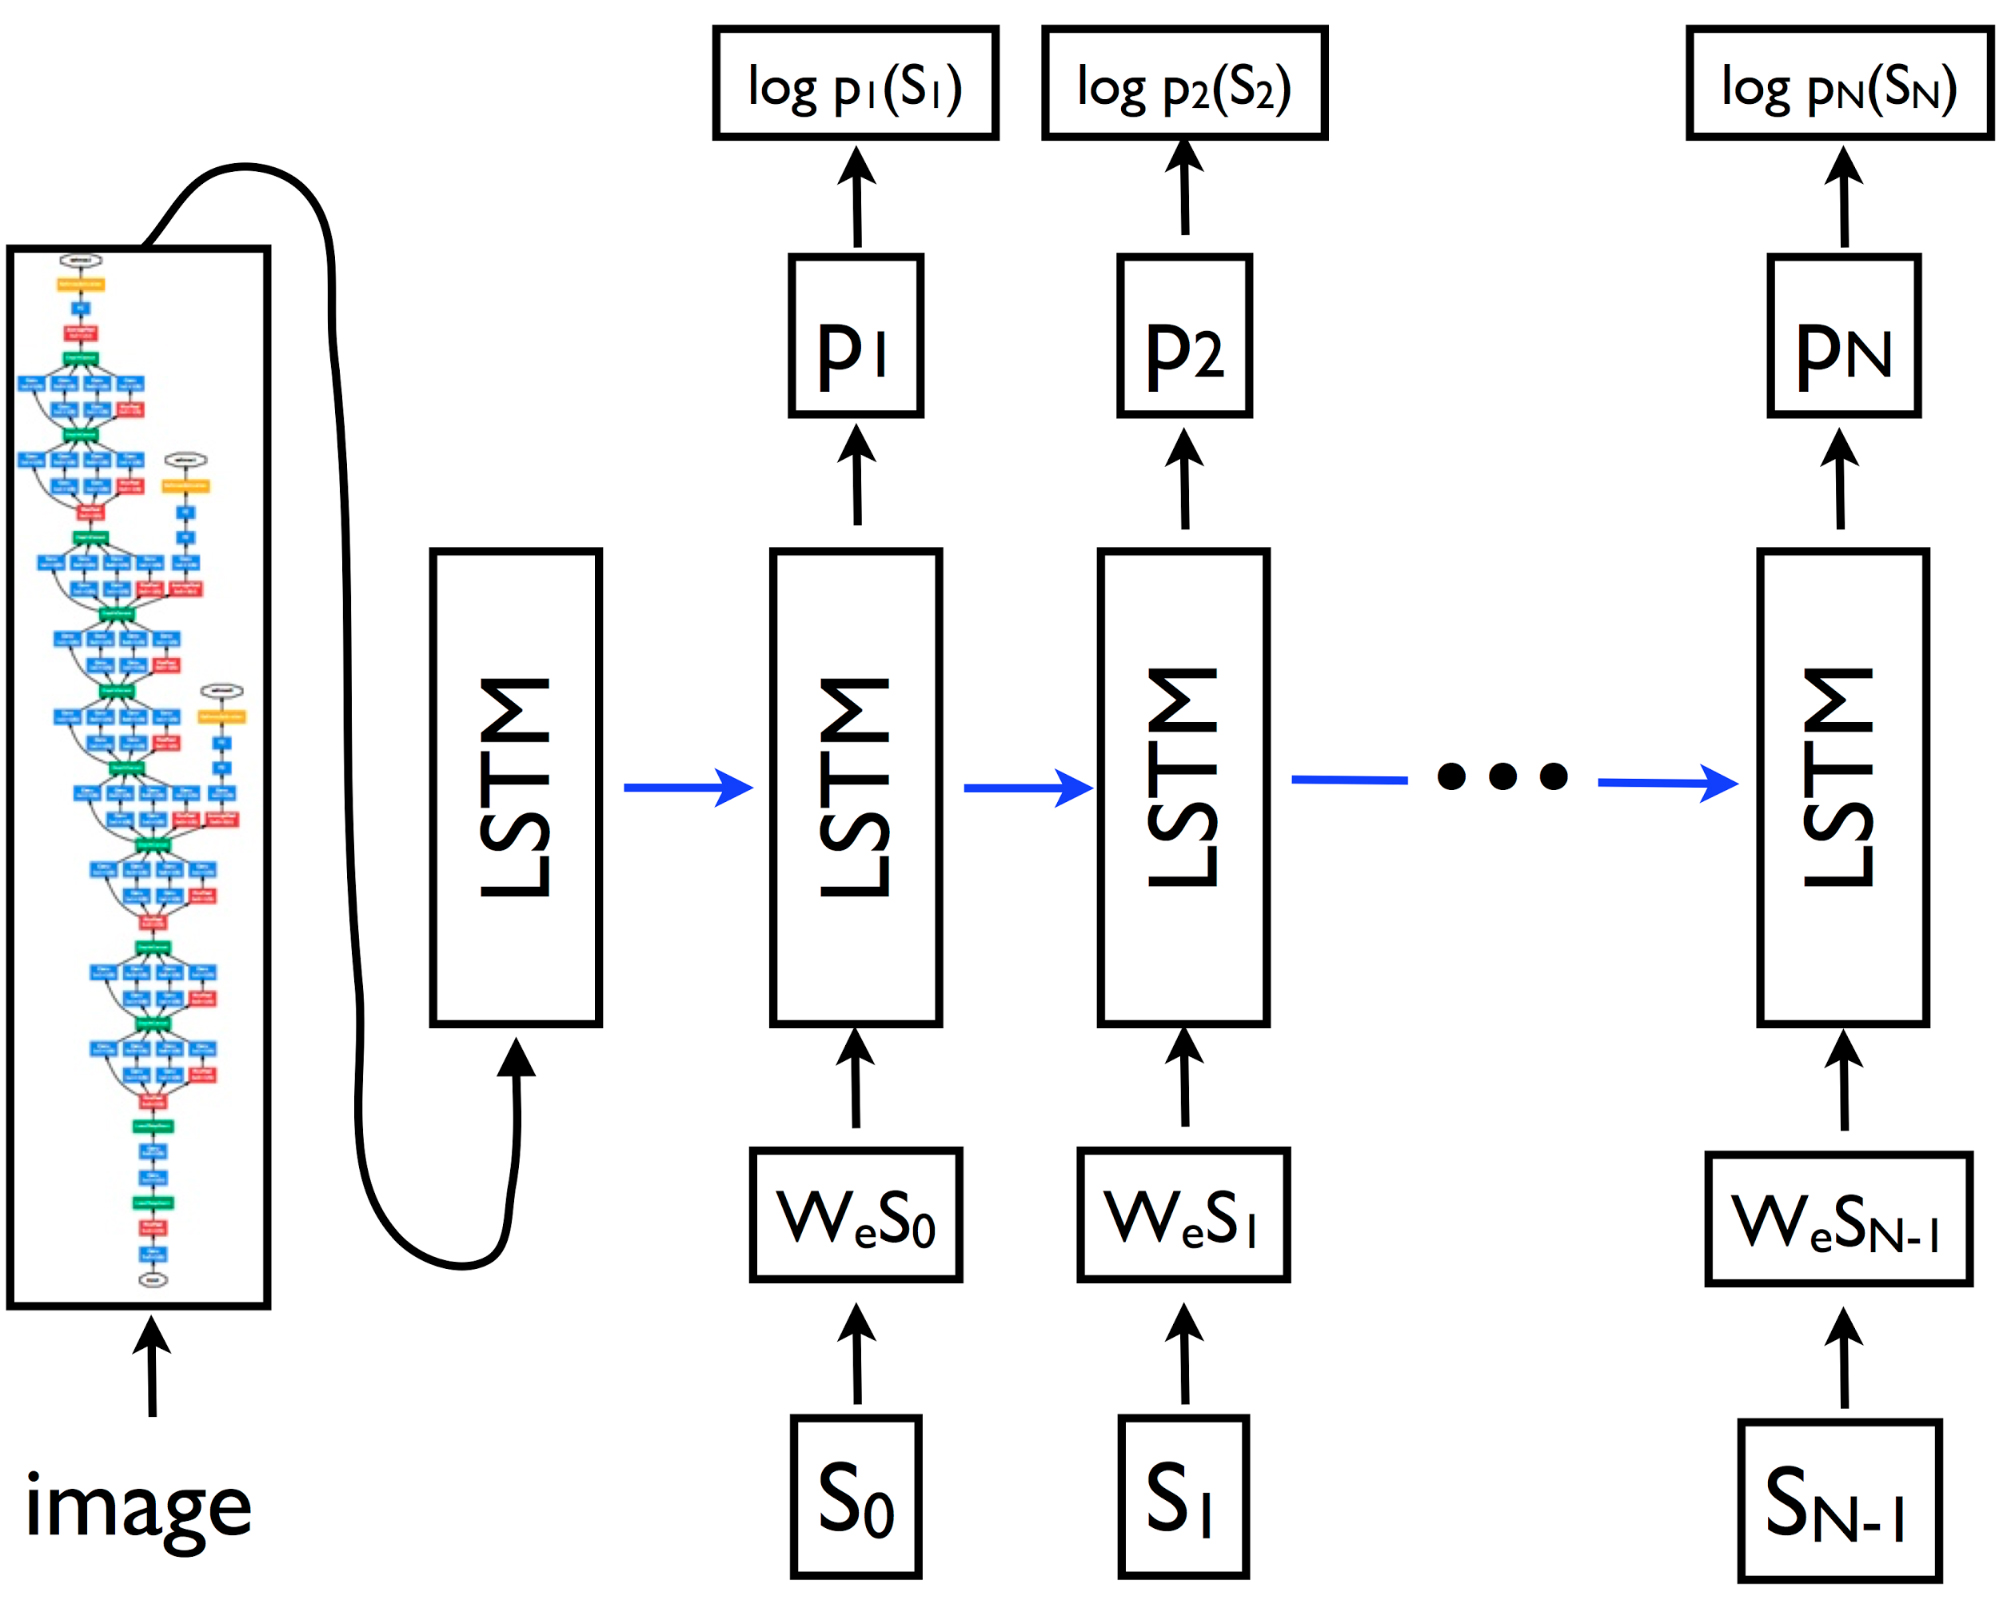

In [4]:
from IPython.display import Image
Image("./cnn-lstm.jpg")



Image Captioning problem is a task to generate description explaining the content of a given image input. The widely used method to deal with this problem is to use encoder-decoder framework. An encoder to extract information/ feature from the input image, and a decoder to generate suitable description based on the features from the encoder. 

##### Encoder

For the Encoder, Convolutional Neural Network (CNN), especially the ResNet pretrained on ILSVRC dataset is used. The ResNet extracts feature vector from given image, which then gets fed into the Decoder; the last hidden state of the CNN is connected to the Decoder.

##### Decoder 

For the decoder, Recurrent Neural Network (RNN) gets used for language modelling conditioned on the feature vector. In this case, vanilla LSTM is used to generate the captions. The source and target texts for training the decoder are predefined. For example, if the image description is "I love deep learning course", the source list is ['< start >', 'I', 'love', 'deep', 'learning', 'course'] and the target list is ['I', 'love', 'deep', 'learning', 'course', '< end >']. 

### Result and Evaluation

##### Best Image Captioning Results (BLEU > 0.8)

Below are some good examples of the image captioning from the network

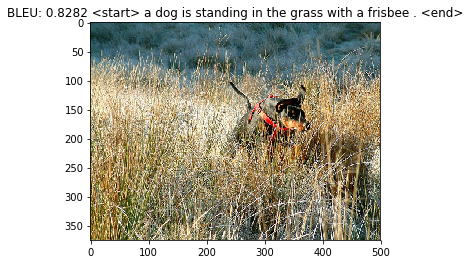

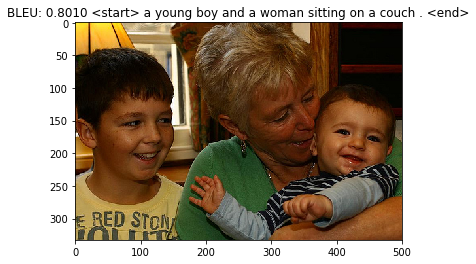

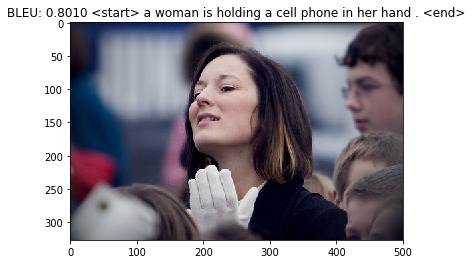

In [43]:
for sample in best_sample_results:
    plt.figure()
    input_image = Image.open(os.path.join(img_dir, sample['img_id']))
    plt.title('BLEU: ' + str(sample['bleu'])[:6] + ' ' + sample['caption'])
    plt.imshow(input_image)

##### Best Image Captioning Results (BLEU < 0.15)
Below are some bad examples of the image captioning from the network

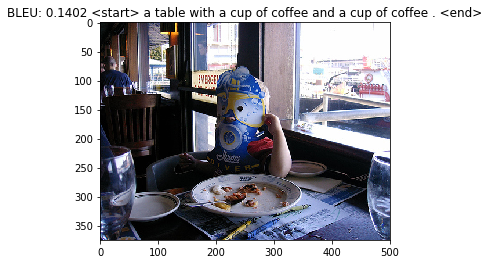

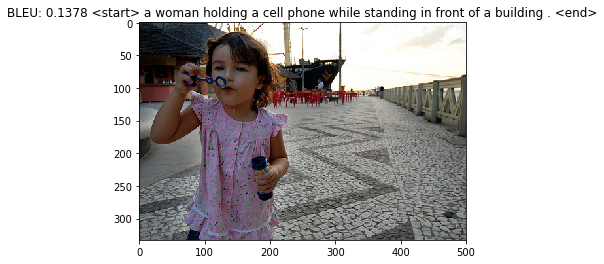

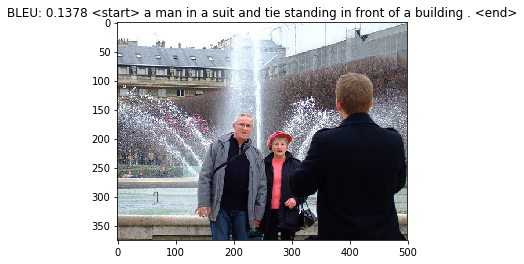

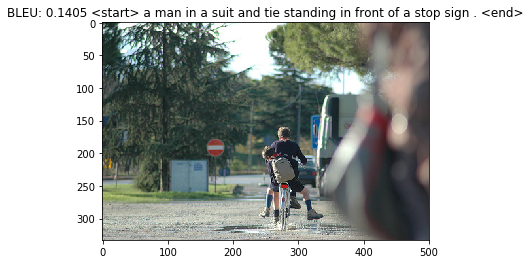

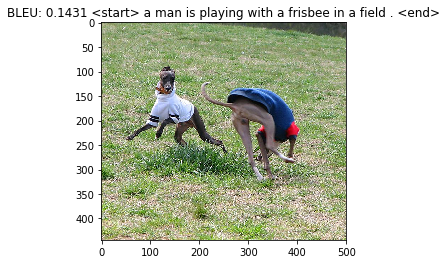

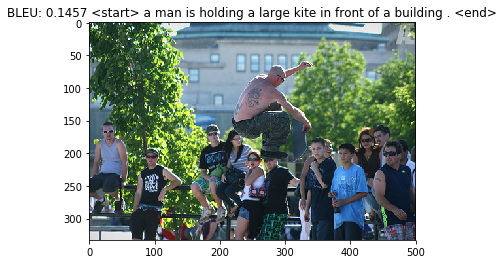

In [46]:
for sample in worst_sample_results:
    if sample['bleu'] < 0.15 :
        plt.figure()
        input_image = Image.open(os.path.join(img_dir, sample['img_id']))
        plt.title('BLEU: ' + str(sample['bleu'])[:6] + ' ' + sample['caption'])
        plt.imshow(input_image)